# Graphing and Display

## Overview:
- Teaching: _time_
- Exercises: _time_

Objectives:
- Introduce MATLAB's graphical capabilities.
- Practice use of `plot`, `scatter`, `semilog`, `contour` and `surf`.
- Learn how to create a figure rather than just a plot.

## Graphs in MATLAB

MATLAB comes pre-packaged with extensive graphical features for creating diagrams or graphs to display your results - which can be very handy if you're looking to produce figures for a paper or report.
MATLAB is also able to render text in LaTeX too, and gives you a lot of control over the layout of the figures you produce and how they are exported.
In this lesson we will take a look at a select few options for creating graphs, as well as discussing some simple ways to add a professional glean to your MATLAB figures.

## Creating A Figure

We can create a figure in MATLAB using the `figure()` command, and can get it to plot some values using the `plot` command:

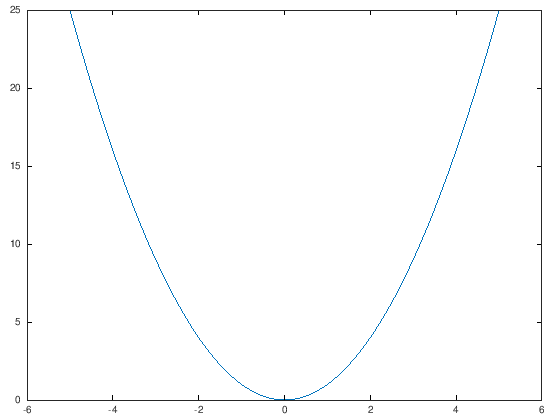

In [1]:
fig1 = figure(1); %create a new figure
plot([-5:0.1:5],[-5:0.1:5].^2) %plot y=x^2 for x between -5 and 5, in steps of 0.1

This will create an figure window that should open automatically - you can freely minimise or close this window down and still edit the figure in MATLAB.
If you elect not to type in the `plot` command, MATLAB will still open an empty figure window for you.
We will talk about the various graphing functions MATLAB has, including `plot`, in more detail later.

The argument `1` in `figure` is the ID number that we are providing this new figure with.
You don't have to provide this number; calling `figure()` on it's own will still create a new figure window for you to add plots to, and MATLAB will automatically give it a new, unique, ID number.

The output, `fig1` is what's called a figure handle, but it can be thought of as just the figure's ID number.
Indeed, if we display `fig1` using `disp`:

In [2]:
disp(fig1)

 1


we can see that `fig1` really is the ID number for the figure.
Also notice how `disp` doesn't make the figure window reopen if you closed it before!

By default, every time you make a change to a figure, the figure window will update and reopen if it was closed previously.
For this reason if you are creating a figure it is best to do it in a script: that way you can write out all the commands you need to make your figure, and the result will only be displayed once the script has finished running.
If you are creating a script in the command line, you will constantly have to keep changing windows from the figure to the command line, and back again as MATLAB automatically opens your figure window after every command!

### Why provide arguments?

You'll notice that you can get away with _not_ providing an ID number _or_ an output when calling `figure`:

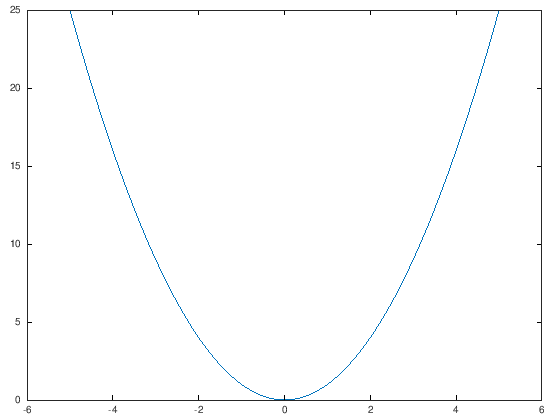

In [3]:
figure();
plot([-5:0.1:5],[-5:0.1:5].^2) %plot y=x^2 for x between -5 and 5, in steps of 0.1

So you might be asking "why should I have bothered with the input and outputs"?
The answer is because `figure` has two uses:
- `fig = figure(ID)` creates a new plot with the ID number in `ID`, and returns the figure handle `fig`.
- `figure(fig)` changes the "current" or "active" plot window to the figure with handle `fig`.

As such, when you just call `figure()` you are creating a new figure, _and_ setting it to be the active figure.
This is fine if you want to create only one plot, as running the above code causes MATLAB to happily create a figure, plot your data, and then display it to you.
But now let's pretend you want to create another figure, so you type:

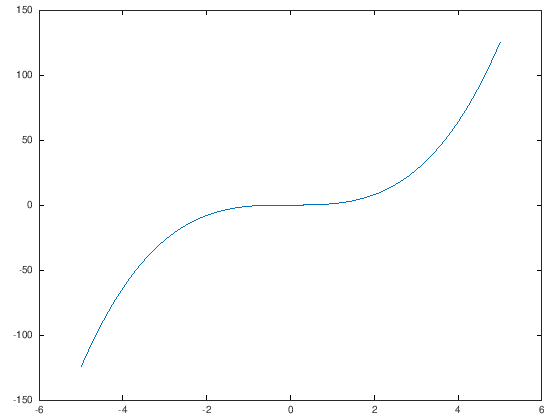

In [4]:
figure();
plot([-5:0.1:5],[-5:0.1:5].^3) %plot y=x^3 for x between -5 and 5, in steps of 0.1

Hooray, you've now got another plot... but how do you retrieve the old plot you had?
Well, you just need to call `figure` with it's figure handle or ID number of course... the only problem being that you didn't save this to a variable... so you've got no idea what it is!

As such, it is important that you get into the habbit of assigning your figures ID numbers and figure handles, so that you don't loose them when you start generating multiple figures!

## Let's Get Plotting

Now that the preamble is over, let's get down to the business of actually plotting something!
To do this, we're going to need some data or a function, so let's quickly recall our ~~pringle~~ hyperbolic paraboloid function from the previous lesson;
$$ f(x,y,a,b) = \frac{x^2}{a^2} + \frac{y^2}{b^2} $$

In [5]:
function [z] = f(x,y,a,b)
%%Evaluates the function z = x^2/a^2 + y^2/b^2
%INPUTS:
% x : Vector of length N, for N>=1. This vector should contain all the x-values we want to evaluate f at
% y : Vector of length N, for N>=1. Same size as input x, with analogous interpretation
% a,b : Scalar values for the curvature parameters.
%OUTPUTS:
% z : Vector of length N, for N>=1. Value of the function f at each of the co-ordinate pairs x,y.

%NOTE: MATLAB likes vectorised code, so we are writing this function as if we want to evaluate f at lots of pairs of points (x,y), rather than at just one point.

z = (x.*x)./(a*a) + (y.*y)/(b*b);

end %function

We can use the `plot` command to, well, plot some data in a figure as a series of points connected by lines (which MATLAB will automatically create as linear interpolants).
Let's create a plot of $f$ for $y=0$, $a=2$ and for $x\in[-2,2]$.
Of course, we will need to discretise $[-2,2]$ first using `linspace`:

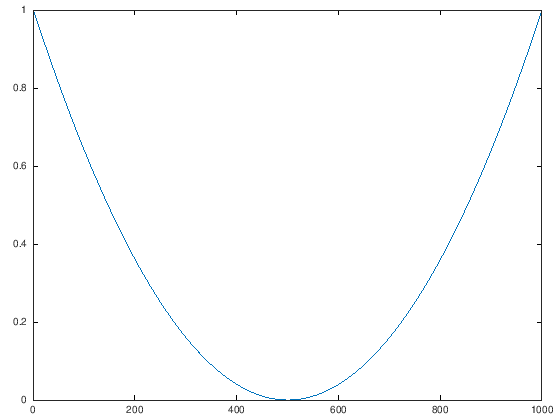

In [6]:
close all; %let's close any plots we opened as examples from before

xRange = linspace(-2,2,1000); %put 1000 points between -2 and 2, inclusive
fHandle = @(x) f(x,0,2,1); %for convenience, create a function handle for f when y=0 and a=2. 
%Note: the value of b doesn't matter, but setting b=0 will cause a 0/0 division error, so don't pick that!

fValues = fHandle(xRange); %evaluates f(x,0,2,1) at all the x values in xRange

fig_y0 = figure(1); %create a figure to display the plot
plot(fValues) %plot the data in fValues to the current/active figure - in this case, to fig_y0

MATLAB should generate a nice-looking parabola for you when you run this code; however you might have notice a few things that could be improved with this figure:
- The x-axis isn't from $-2$ to $2$.
- Your parabola is coloured blue, but you might want it in black or red or green.
- There are no labels for any of your axes - how will people know what you've plotted?

### Fixing the $x$-axis

`plot` is one of those MATLAB functions that has multiple inputs and will produce different outputs depending on what you give it.
In the example above, we only gave `plot` the array `fValues` - that is we only told MATLAB what our $y$-axis data was.
So when MATLAB creates the figure, it doesn't have any data for the $x$-axis so just works off the assumption that "the first data point is at $x=1$, the second at $x=2$ ..." and so forth.
If we call `plot` by giving it the $x$-data and then the $y$-data, everything will sort itself out:

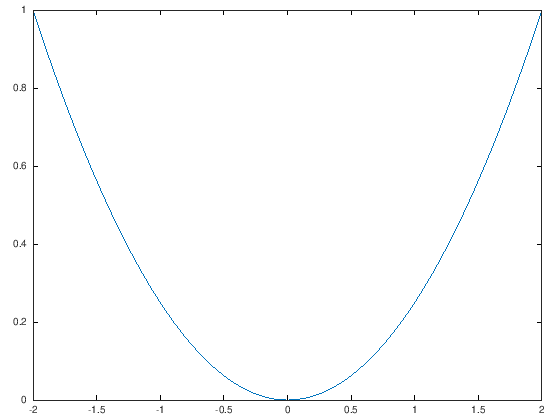

In [7]:
figure(fig_y0); %ensure that fig_y0 is still the active plot
plot(xRange, fValues) %plot fValues in y against xRange in x

That should fix the scale issue with the $x$-axis.
Also notice how `plot` has overwritten the previous plot that was saved in figure `fig_y0`.

### Pretty colours

Although it might seem fairly petty now, when you come to plotting multiple sets of data you're going to need to be able to change the colours that you're using.
This is done by providing a third argument to `plot` which is a string:

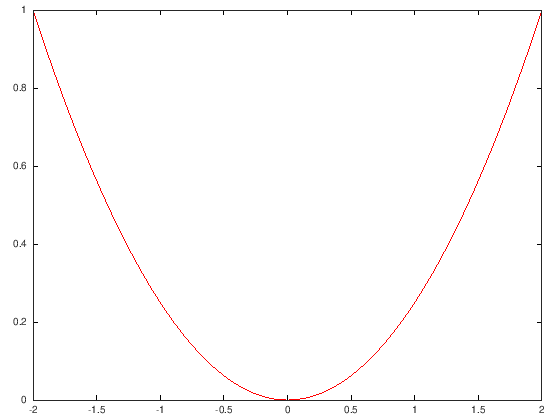

In [8]:
figure(fig_y0); %ensure that fig_y0 is still the active plot
plot(xRange, fValues, 'r')

In this case, we have provided the string `'r'`, which indicated to MATLAB that it should be plotting our data in _red_.
There are several other colours to choose from.
This third string argument is referred to as a "format string" - it is a set of characters that MATLAB interprets as a format for the line in our plot.
These format strings can do more than change the colour of the plotted line - they can add the data points as crosses or circles, they can change the line style to a dashed or dotted line, or any combination of these and the colour.
For more information you can see the online MATLAB help, but below is a table of helpful format strings - try some out for yourself on your plot!

| Line Style     | Format String | Marker (data point) Style | Format String | Colour         | Format String |
|:--------------:|:-------------:|:-------------------------:|:-------------:|:--------------:|:-------------:|
| Solid          | '-'           | Dots                      | '.'           | Red            | 'r'           |
| Dashed         | '--'          | Crosses                   | 'x'           | Blue           | 'b'           |
| MATLAB DEFAULT | ''            | Circles                   | 'o'           | Black          | 'k'           |
|                |               | Stars                     | 'p'           | Green          | 'g'           |
|                |               | MATLAB Default            | ''            | Yellow         | 'y'           |
|                |               |                           |               | MATLAB DEFAULT | ''            |

You can _combine_ format strings in the order marker-line-colour to add multiple formats to your plot.
For example:
- '-r' will plot with default markers, a solid line, and in red.
- '.-k' will plot with dots for markers, a solid line, and in black.
- 'og' will plot with circles for markers, the default line style, and in green.
- 'p--' will plot with stars for markers, a dashed line, and in the default color.

### Titles and axis labels

Finally, we can add some labels to our axes using the commands `title`, `xlabel` and `ylabel`.
When we use these, as with any other plotting functions, they will apply to __and overwrite__ what's in the same place of the current/active figure!

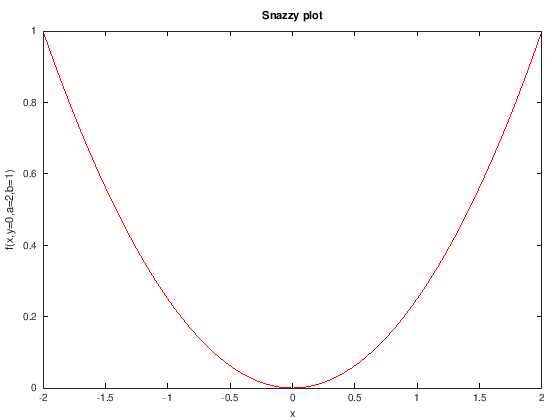

In [9]:
figure(fig_y0); %ensure that fig_y0 is still the active plot
plot(xRange, fValues, 'r')
xlabel('x')
ylabel('f(x,y=0,a=2,b=1)')
title('Snazzy plot')

## Information: LaTeX labels

In order to render your labels in LaTeX, the machine you are using must have a LaTeX interpreter installed or be setup to use MATLAB's internal one correctly.
Otherwise, your labels will just be printed as they appear!

## Exercise: Experimenting with other 2D plots

Now that you have some data to plot; try using some of MATLAB's other 2D plotting features.
They all have the same syntax as `plot`: you give them the $x$-data and $y$-data as arrays, then can optionally give them a format string to change the style of the resulting figure.
- `scatter`
- `semilogx`
- `semilogy`
- `loglog`

Under what circumstances would each graphing method be most useful?

Feel free to use `fig_y0` for each of these graphs, overwriting the previous graph each time, or create a new figure for each.

## Solution: Experimenting with other 2D plots

Each graphing method should produce:
- `scatter`: a scatter plot of the points you provided. Most useful when performing regression analysis or trend fitting.
- `semilogx`: just like `plot`, but the $x$-axis is turned into a log-scale. Useful for plotting functions over multiple orders of magnitude, or for identifying power-law relations.
- `semilogy`: like `semilogx` only in the $y$-axis.
- `loglog`: a combination of `semilogx` and `semilogy`!

## Information: Too Many Figures

If you find yourself with too many figure windows open, or just too many figure handles in your workspace, you can use the command `close all` to close all currently open figure windows for you.

The command `clearvars` will also delete all your figure handles, along with all the other variables in your workspace as normal.

## `hold` on!

Displaying graphs in multiple figure windows is all very well and good, but what if we want to display multiple graphs in the same plot?
As we have seen, calling `plot`, `scatter` or any of the other graphing functions will overwrite what's currently in the active figure.
To tell MATLAB that you want to keep what's in the current figure, and overlay the existing graph with another, you need to use the `hold` command.

By default, `hold` is turned off.
When `hold` is on, calling the graphing functions like `plot` or `semilogx` will not overwrite what's in the active figure, but instead overlay the two data sets in the same graph.
Once `hold` is on, it also stays on!
So you can overlay as many graphs as you like by calling as many graphing methods as you want!
As an example, let's create 3 graphs of $f$ for $y=0$, $x\in[-2,2]$ and for $a=0.5,1,2$, and display them on the same figure:

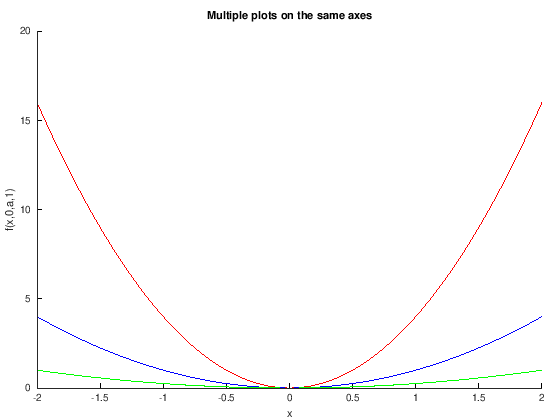

In [10]:
xRange = linspace(-2,2,1000); %1000-point interpolation

fVals_05 = f(xRange,0,0.5,1); %evaluate f at xRange, with a=0.5, y=0 annd b=1
fVals_1 = f(xRange,0,1,1); %a=1 now
fVals_2 = f(xRange,0,2,1); %a=2, like before but not using a function handle this time

fig_multiple_f = figure(2); %create new figure and make it the active figure
hold on; %turn hold on, so we now overlay plots
plot(xRange, fVals_05, 'r');
plot(xRange, fVals_1, 'b');
plot(xRange, fVals_2, 'g');
hold off; %turn hold off again
xlabel('x')
ylabel('f(x,0,a,1)')
title('Multiple plots on the same axes')

Running this, we will produce a figure that has 3 graphs in red, blue and green.
To turn `hold` off again, we simply type `hold off` as we do at the end - this is good practice so that you don't end up writing lots of plots over each other by accident!

Of course our figure isn't much use to anyone if they don't know which colours correspond to which variables!
We need to add a legend using the `legend` command:

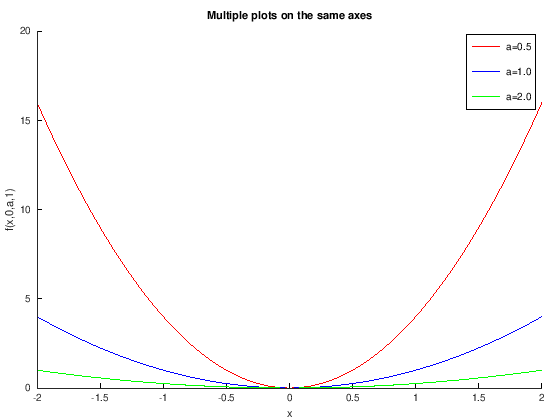

In [11]:
fig_multiple_f_legend = figure(3); %make a new, active figure
hold on; %turn hold on, so we now overlay plots
plot(xRange, fVals_05, 'r');
plot(xRange, fVals_1, 'b');
plot(xRange, fVals_2, 'g');
hold off; %turn hold off again
xlabel('x')
ylabel('f(x,0,a,1)')
title('Multiple plots on the same axes')
legend('a=0.5','a=1.0','a=2.0')

To use `legend`, we give it as many strings as we have plots, and MATLAB interprets these as the labels for each of our grahing commands - _in the order that they were plotted!_

`legend` behaves similarly to `xlabel`, `title` and `ylabel`: it applies to the current plot and overwrites the existing legend if there is one.

For the full list of options for `legend`, look at the [MATLAB documentation](https://uk.mathworks.com/help/matlab/ref/legend.html) or use the `help` function.

## Information+: Save my figures

To save your figures, you can use MATLAB's `savefig` command.
All you need to do is execute `savefig` and provide the figure handle that corresponds to the figure you want to save, and the name you want to save it under!
Similarly, you can load in a figure by clicking on it in the current directory, or by using the `openfig` command:

```octave
savefig(fig_multiple_f_legend,'MultiplePlotsFigure');

clear;
close all; %clear the variable workspace to prove that we are loading in the figure we saved

openfig('MultiplePlotsFigure');
```

:+Information

## Transending the Cartesian Plane

2D-plots will be the most common plots that you produce, however in you may find yourself wanting to plot surfaces, by which we mean (in this lesson) functions of two variables $(x,y)$.
Fortunately, MATLAB has a few built-in 3D-plotting functions that you can use, and their syntax is very intutitive if you're familiar (which you now are, of course) with the 2D-plotting functions.

The two graphing methods that we are going to demonstrate are `surf` (3D-surface plot) and `contour` (contour plot of a surface.
To plot these, we are going to need some $x$-data, $y$-data and $z$-data, so let's return to our ~~pringle~~ hyperbolic paraboloid function $f$ and fix $a=2$, $b=1$, and look at $x\in[-5,5]$, $y\in[-5,5]$.

In [12]:
fHandle_2D = @(x,y) f(x,y,2,1); %function handle that evaluates f with a=2 and b=1 fixed.

num_points = 100; %number of points to put down in x and y

xRange = linspace(-5,5,num_points);
yRange = linspace(-5,5,num_points);

%this command produces two arrays X,Y which are a grid defined by xRange and yRange:
%Essentially X and Y contain every possible pairing of a value in xRange with a value in yRange.
%Hence they form a grid or meshgrid.
[X,Y] = meshgrid(xRange, yRange);

%Now we create an array of our surface values
zData = fHandle_2D(X,Y);
%Notice that our zData array is of size num_points-by-num_points!
disp(size(zData))

   100   100


The `meshgrid` command employed here is useful for creating a grid out of two arrays that correspond to the points you want to evaluate your function at along the $x$ and $y$ axes.

Notice too that the size of our `zData` array - the array that stores the values of $f$ - is of size `num_points`$^2$; think of it like `zData` is putting  value at each pair of $x$ and $y$ values.
Always be careful with surface plots that you haven't put down too many points, as your computer may slow down due to the memory needed to store the values!

Having created our data though, we can now plot it.
First, let's use `contour` to create a contour plot.
`contour` takes (at least) 3 arguments: the $x$-data, $y$-data and $z$-data; then you can also give it a format string as you would in the 2D case.
Remember, `contour` will overwrite the graph in the current figure unless we define a new figure, or `hold` is on.

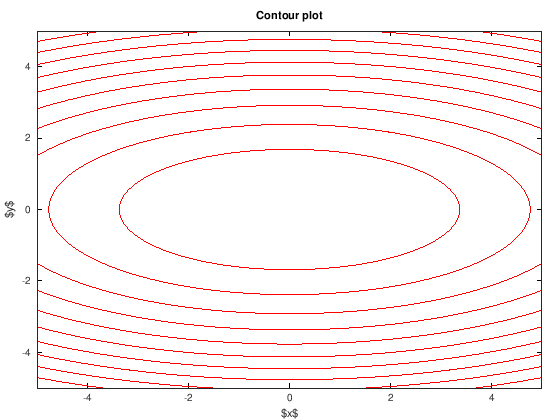

In [13]:
fig_contour = figure(4);

contour(xRange,yRange,zData,'r')
xlabel('$x$','interpreter','latex')
ylabel('$y$','interpreter','latex')
title('Contour plot')

If `hold` is on we can overlay contour plots with other graphs (even overlaying them with 2D plots, although then things get a bit complex) and can add legends to them using the `legend` command.

However, the most fancy thing we can do is a full-blown, 3D-rendered graphic image of our surface $f$.
This is where `surf` comes in: again we need to give `surf` the $x$-, $y$- $z$- information, but we can't provide a format string to change the colouring of the image.
Again `surf` will overwrite the current graph in the active figure, and although you can use `hold` to overlay it with other images, __DON'T__ - bad things will happen.

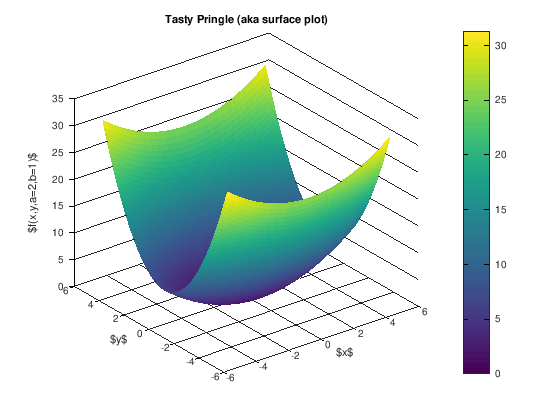

In [14]:
fig_surf = figure(5);

surf(xRange,yRange,zData,'edgecolor','none') %edgecolor is the color of the lines that are connecting the data-points - this 'edgecolor','none' turns these lines off to make the surface plot look nicer.

%this command provides a bar outside the figure so that we can read off the zData
colorbar; %MATLAB is American - so get used to having loads of syntax errors for spelling color "incorrectly"

xlabel('$x$','interpreter','latex')
ylabel('$y$','interpreter','latex')
zlabel('$f(x,y,a=2,b=1)$','interpreter','latex') %note that a surface plot has a zlabel too!
title('Tasty Pringle (aka surface plot)')

## Key Points:
- We create new figures and set the current/active figure using the `figure()` command.
- When a figure is active, all graphing commands are applyed to it.
- We can use `hold` to overlay graphs on the same figure.
- We can add axes labels, titles and legends to figures.
- We store the data we want to plot in arrays.
- Common graphing commands are `plot`, `scatter`, `semilogx`, `semilogy`, `loglog`, `contour` and `surf`.